In [37]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from xgboost import XGBRegressor
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.ensemble import RandomForestRegressor 
from sklearn import linear_model

In [2]:
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [3]:
sales_data = pd.read_csv('Train.csv')

In [4]:
sales_data

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [5]:
sales_data.head()


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [6]:
sales_data.shape

(8523, 12)

In [7]:
sales_data.isnull()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,True,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,False,False,False,False,False,False,False,False,False,False,False,False
8519,False,False,False,False,False,False,False,False,True,False,False,False
8520,False,False,False,False,False,False,False,False,False,False,False,False
8521,False,False,False,False,False,False,False,False,False,False,False,False


In [8]:
sales_data.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [9]:
Weight_Mean = sales_data['Item_Weight'].mean()

In [10]:
sales_data['Item_Weight'].median()

12.6

In [17]:
sales_data['Item_Weight'] = sales_data['Item_Weight'].fillna(Weight_Mean)

In [18]:
sales_data.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [12]:
Outlet_Size_mode = sales_data['Outlet_Size'].mode()[0]

In [13]:
Outlet_Size_mode

'Medium'

In [14]:
sales_data['Outlet_Size'] = sales_data['Outlet_Size'].fillna(Outlet_Size_mode)

In [15]:
sales_data['Outlet_Size'].isnull().sum()

0

In [19]:
sales_data.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [20]:
Outlet_Size_mode = sales_data['Outlet_Size'].mode()[0]

In [21]:
Outlet_Size_mode

'Medium'

In [22]:
sales_data['Outlet_Size'] = sales_data['Outlet_Size'].fillna(Outlet_Size_mode)

In [23]:
sales_data['Outlet_Size'].isnull().sum()

0

In [24]:
sales_data.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [25]:
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [26]:
sales_data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.226124,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,9.310000,0.026989,93.826500,1987.000000,834.247400
50%,12.857645,0.053931,143.012800,1999.000000,1794.331000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [27]:
import seaborn as sns

<Figure size 600x600 with 0 Axes>

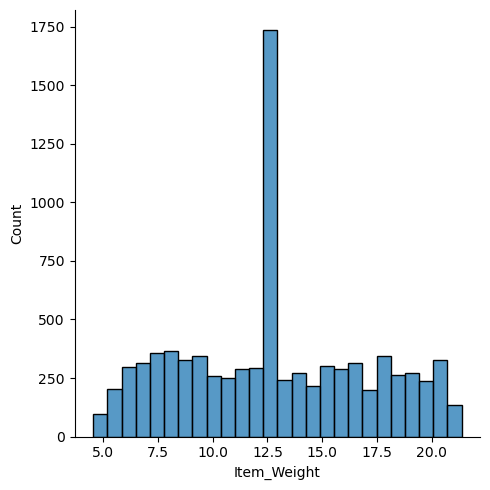

In [28]:
plt.figure(figsize=(6,6))
sns.displot(sales_data['Item_Weight'])
plt.show()          

<Figure size 500x500 with 0 Axes>

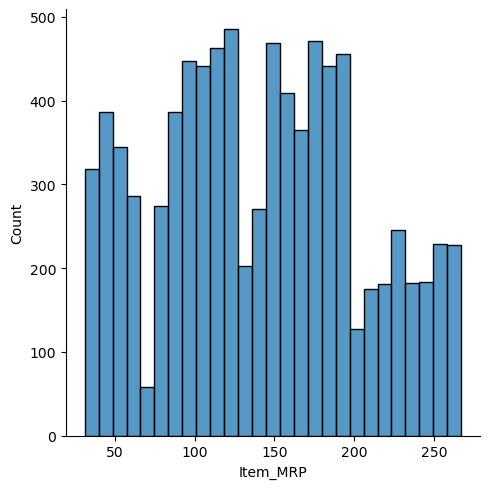

In [29]:
plt.figure(figsize=(5,5))
sns.displot(sales_data['Item_MRP'])
plt.show()

<Figure size 500x500 with 0 Axes>

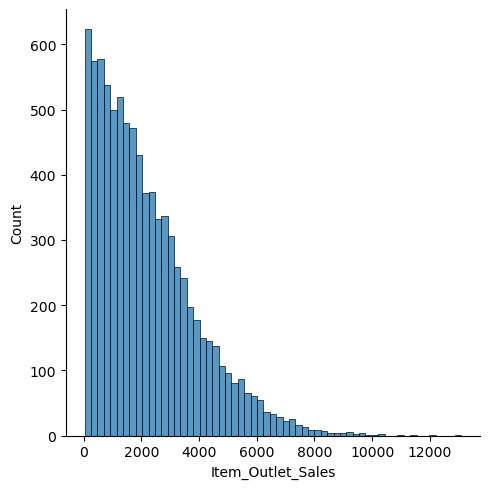

In [30]:
plt.figure(figsize=(5,5))
sns.displot(sales_data['Item_Outlet_Sales'])
plt.show()

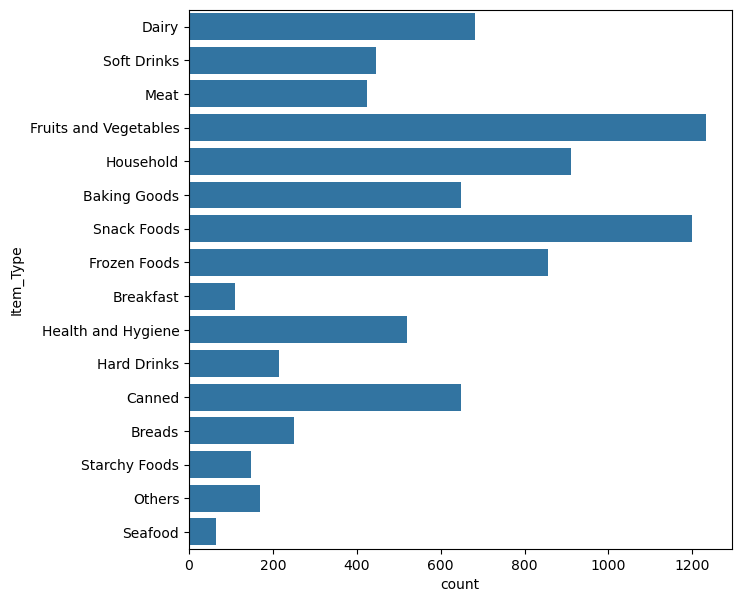

In [31]:
plt.figure(figsize=(7,7))
sns.countplot(sales_data['Item_Type'])
plt.show()


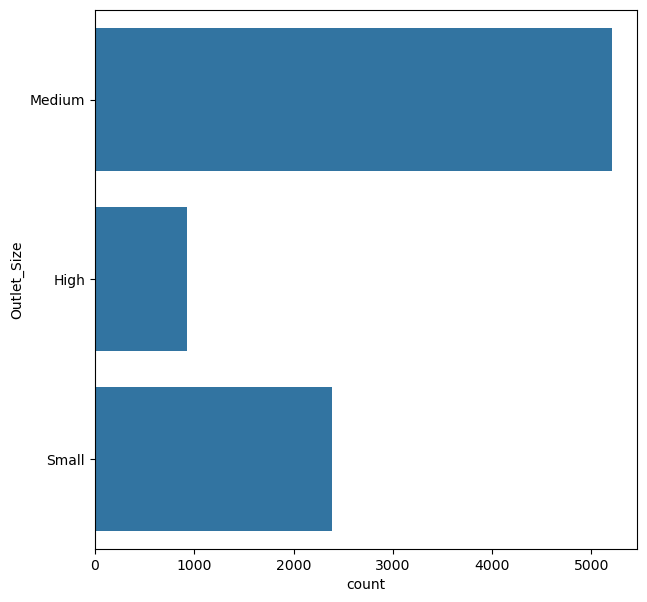

In [32]:
plt.figure(figsize=(7,7))
sns.countplot(sales_data['Outlet_Size'])
plt.show()

In [33]:
sales_data['Item_Fat_Content'].value_counts()

Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: count, dtype: int64

In [34]:
 sales_data.replace({'Item_Fat_Content':{'low fat':'Low Fat','LF':'Low Fat','reg':'Regular','regular':'Regular' }},inplace = True)

In [35]:
sales_data['Item_Fat_Content'].value_counts()

Item_Fat_Content
Low Fat    5517
Regular    3006
Name: count, dtype: int64

In [36]:
sales_data.head(20)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300000,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920000,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500000,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200000,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.930000,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395000,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
6,FDO10,13.650000,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528
7,FDP10,12.857645,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
8,FDH17,16.200000,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,Medium,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200000,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,Medium,Tier 2,Supermarket Type1,4710.5350



# Label encoding to convert categorical data into numerical data

In [39]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
sales_data['Item_Identifier'] = encoder.fit_transform(sales_data['Item_Identifier'])
sales_data['Item_Fat_Content']= encoder.fit_transform(sales_data['Item_Fat_Content'])
sales_data['Item_Type']= encoder.fit_transform(sales_data['Item_Type'])
sales_data['Outlet_Identifier']= encoder.fit_transform(sales_data['Outlet_Identifier'])
sales_data['Outlet_Size']= encoder.fit_transform(sales_data['Outlet_Size'])
sales_data['Outlet_Location_Type']= encoder.fit_transform(sales_data['Outlet_Location_Type'])
sales_data['Outlet_Type']= encoder.fit_transform(sales_data['Outlet_Type'])


In [40]:
sc = StandardScaler()

sales_data['Item_Weight'] = sc.fit_transform(sales_data['Item_Weight'].values.reshape(-1,1))

sales_data['Item_Visibility'] = sc.fit_transform(sales_data['Item_Visibility'].values.reshape(-1,1))

sales_data['Item_MRP'] = sc.fit_transform(sales_data['Item_MRP'].values.reshape(-1,1))

sales_data['Item_Outlet_Sales'] = sc.fit_transform(sales_data['Item_Outlet_Sales'].values.reshape(-1,1))

sales_data.head(10)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,-8.418717e-01,0,-0.970732,4,1.747454,9,1999,1,0,1,0.910601
1,8,-1.641706e+00,1,-0.908111,14,-1.489023,3,2009,1,2,2,-1.018440
2,662,1.098554e+00,0,-0.956917,10,0.010040,9,1999,1,0,1,-0.049238
3,1121,1.500838e+00,1,-1.281758,6,0.660050,0,1998,1,2,0,-0.849103
4,1297,-9.294275e-01,0,-1.281758,9,-1.399220,1,1987,0,2,1,-0.695373
5,758,-5.827538e-01,1,-1.281758,0,-1.438734,3,2009,1,2,2,-0.952110
6,696,1.875007e-01,1,-1.034813,13,-1.338238,1,1987,0,2,1,-1.076967
7,738,-3.755714e-16,0,1.188838,13,-0.533641,5,1985,1,2,3,1.079158
8,440,7.909259e-01,1,-0.958331,5,-0.706908,7,2002,1,1,1,-0.647381
9,990,1.500838e+00,1,0.548845,5,0.752008,2,2007,1,1,1,1.482212


In [41]:
sales_data.head(30)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,-8.418717e-01,0,-0.970732,4,1.747454,9,1999,1,0,1,0.910601
1,8,-1.641706e+00,1,-0.908111,14,-1.489023,3,2009,1,2,2,-1.018440
2,662,1.098554e+00,0,-0.956917,10,0.010040,9,1999,1,0,1,-0.049238
3,1121,1.500838e+00,1,-1.281758,6,0.660050,0,1998,1,2,0,-0.849103
4,1297,-9.294275e-01,0,-1.281758,9,-1.399220,1,1987,0,2,1,-0.695373
5,758,-5.827538e-01,1,-1.281758,0,-1.438734,3,2009,1,2,2,-0.952110
6,696,1.875007e-01,1,-1.034813,13,-1.338238,1,1987,0,2,1,-1.076967
7,738,-3.755714e-16,0,1.188838,13,-0.533641,5,1985,1,2,3,1.079158
8,440,7.909259e-01,1,-0.958331,5,-0.706908,7,2002,1,1,1,-0.647381
9,990,1.500838e+00,1,0.548845,5,0.752008,2,2007,1,1,1,1.482212


In [42]:
((sales_data['Item_Visibility'] == 0).sum())

0

# SPLITTING SALES DATA INTO X AND Y

In [43]:
X = sales_data.drop(columns='Item_Outlet_Sales',axis=1)
y = sales_data['Item_Outlet_Sales']

In [44]:
sales_data.head(10)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,-8.418717e-01,0,-0.970732,4,1.747454,9,1999,1,0,1,0.910601
1,8,-1.641706e+00,1,-0.908111,14,-1.489023,3,2009,1,2,2,-1.018440
2,662,1.098554e+00,0,-0.956917,10,0.010040,9,1999,1,0,1,-0.049238
3,1121,1.500838e+00,1,-1.281758,6,0.660050,0,1998,1,2,0,-0.849103
4,1297,-9.294275e-01,0,-1.281758,9,-1.399220,1,1987,0,2,1,-0.695373
5,758,-5.827538e-01,1,-1.281758,0,-1.438734,3,2009,1,2,2,-0.952110
6,696,1.875007e-01,1,-1.034813,13,-1.338238,1,1987,0,2,1,-1.076967
7,738,-3.755714e-16,0,1.188838,13,-0.533641,5,1985,1,2,3,1.079158
8,440,7.909259e-01,1,-0.958331,5,-0.706908,7,2002,1,1,1,-0.647381
9,990,1.500838e+00,1,0.548845,5,0.752008,2,2007,1,1,1,1.482212


In [45]:
X

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,156,-0.841872,0,-0.970732,4,1.747454,9,1999,1,0,1
1,8,-1.641706,1,-0.908111,14,-1.489023,3,2009,1,2,2
2,662,1.098554,0,-0.956917,10,0.010040,9,1999,1,0,1
3,1121,1.500838,1,-1.281758,6,0.660050,0,1998,1,2,0
4,1297,-0.929428,0,-1.281758,9,-1.399220,1,1987,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...
8518,370,-1.418084,0,-0.181193,13,1.180783,1,1987,0,2,1
8519,897,-1.059578,1,-0.371154,0,-0.527301,7,2002,1,1,1
8520,1357,-0.534243,0,-0.599784,8,-0.897208,6,2004,2,1,1
8521,681,-1.336444,1,1.532880,13,-0.607977,3,2009,1,2,2


In [46]:
y

0       0.910601
1      -1.018440
2      -0.049238
3      -0.849103
4      -0.695373
          ...   
8518    0.349915
8519   -0.956402
8520   -0.579100
8521   -0.196725
8522   -0.829594
Name: Item_Outlet_Sales, Length: 8523, dtype: float64

In [47]:
from sklearn.model_selection import train_test_split

# splitting X and y into training and testing

In [48]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=101,shuffle=True,test_size=.3)

In [68]:
Scalar = StandardScaler()
X_train = Scalar.fit_transform(X_train)
X_test = Scalar.transform(X_test)

# CREATING MODELS

### 1. LINEAR REGRESSION

In [69]:
reg_lr = linear_model.LinearRegression()
reg_lr.fit(X_train, y_train)

y_test_preds = reg_lr.predict(X_train)
print("Training Data")
print("R2-score: ", r2_score(y_train, y_train_preds))
print("MAE: ", mean_absolute_error(y_train, y_train_preds))
print("MSE: ", mean_squared_error(y_train, y_train_preds))
print("-------------------------------------------------------")
print("Testing Data")
y_test_preds = reg_lr.predict(X_test)
print("R2-score: ", r2_score(y_test, y_test_preds))
print("MAE: ", mean_absolute_error(y_test, y_test_preds))
print("MSE: ", mean_squared_error(y_test, y_test_preds))

Training Data
R2-score:  0.6809722596657498
MAE:  0.40759671375269907
MSE:  0.32913937625568673
-------------------------------------------------------
Testing Data
R2-score:  0.5209841335416394
MAE:  0.5037404652329623
MSE:  0.44197093547097677


### 2.RANDOMFOREST REGRESSION

In [70]:
reg_fr = RandomForestRegressor(n_estimators=100,random_state=42)
reg_fr.fit(X_train, y_train)

y_test_preds = reg_fr.predict(X_train)
print("R2-score: ", r2_score(y_train, y_train_preds))
print("MAE: ", mean_absolute_error(y_train, y_train_preds))
print("MSE: ", mean_squared_error(y_train, y_train_preds))
print("-------------------------------------------------------")
print("Testing Data")
y_test_preds = reg_fr.predict(X_test)
print("R2-score: ", r2_score(y_test, y_test_preds))
print("MAE: ", mean_absolute_error(y_test, y_test_preds))
print("MSE: ", mean_squared_error(y_test, y_test_preds))


R2-score:  0.6809722596657498
MAE:  0.40759671375269907
MSE:  0.32913937625568673
-------------------------------------------------------
Testing Data
R2-score:  0.5666856986631019
MAE:  0.4462155306807685
MSE:  0.3998037236861947


### 3.XGBOOST REGRESSION

In [71]:
reg_xg = XGBRegressor(n_estimator=100,random_state=42,max_depth=3)
reg_xg.fit(X_train, y_train)

y_train_preds = reg_xg.predict(X_train)
print("Training Data")
print("R2-score: ", r2_score(y_train, y_train_preds))
print("MAE: ", mean_absolute_error(y_train, y_train_preds))
print("MSE: ", mean_squared_error(y_train, y_train_preds))
print("-------------------------------------------------------")
print("Testing Data")
y_test_preds = reg_xg.predict(X_test)
print("R2-score: ", r2_score(y_test, y_test_preds))
print("MAE: ", mean_absolute_error(y_test, y_test_preds))
print("MSE: ", mean_squared_error(y_test, y_test_preds))

Training Data
R2-score:  0.6809722596657498
MAE:  0.40759671375269907
MSE:  0.32913937625568673
-------------------------------------------------------
Testing Data
R2-score:  0.5926623082652535
MAE:  0.43447180614596004
MSE:  0.37583602814593586


In [72]:
#save the model
import joblib
joblib.dump(reg_xg,'model.pkl')


['model.pkl']

In [91]:
reg = joblib.load('XGBRegressor.joblib')

In [94]:
import pickle

In [95]:
with open('XGBRegressor.joblib', 'rb') as model_file:
    model = pickle.load(model_file)

In [97]:
# Fit a scaler on the target variable (Item_Outlet_Sales) during training
sc_target = StandardScaler()
sc_target.fit(sales_data[['Item_Outlet_Sales']])

StandardScaler()

In [98]:
test_df = [[156,9.3,0,0.016,4,249,9,1999,1,0,1]]
test_data_pred = model.predict(test_df)
print(test_data_pred)
test_data_pred_original = sc_target.inverse_transform(test_data_pred.reshape(-1, 1))

print("Predicted value in original scale:", test_data_pred_original)

[2.5280032]
Predicted value in original scale: [[2.5280032]]


In [85]:
# Make a prediction on the scaled input test data
test_df = [[156,-0.8,0,-0.9707,4,1.7474,9,1999,1,0,1]]
test_data_pred = reg_xg.predict(test_df)
print("Scaled predicted value:", test_data_pred)

# Rescale the prediction back to the original range
# Assuming 'sc_target' was the scaler fit on 'Item_Outlet_Sales' (the target variable)
test_data_pred_original = sc.inverse_transform(test_data_pred.reshape(-1, 1))

print("Predicted value in original scale:", test_data_pred_original)


Scaled predicted value: [2.014375]
Predicted value in original scale: [[2.014375]]
